# **Lab 1: Understanding Keras Deep Learning Library and Implementing a Simple Neural Network for Handwritten Digit Recognition using Keras**

**Date: 27 September 2023**

**Problem Description:** Using Keras build a Neural Network model and train it using MNIST dataset for doing Handwritten Digit Recognition.

Finally evaluate the performnance of the model on Test Dataset provided in MNIST

## **Introduction to Keras**

Keras is a deep-learning framework for Python that provides a convenient way to define and
train almost any kind of deep-learning model.

Keras was initially developed for
researchers, with the aim of enabling fast experimentation.

Keras has the following key features:


*   It allows the same code to run seamlessly on CPU or GPU.
*   It has a user-friendly API that makes it easy to quickly prototype deep-learning
models.
*   It has built-in support for convolutional networks (for computer vision), recurrent
networks (for sequence processing), and any combination of both.
*   It supports arbitrary network architectures: multi-input or multi-output models,
layer sharing, model sharing, and so on.

This means Keras is appropriate for
building essentially any deep-learning model, from a generative adversarial network
to a neural Turing machine.



<img src='https://drive.google.com/uc?id=1PUHvHv5rJq9Isax38XNw9gNm2VZmfj0x' width="350" height="200"/>

**Figure 1: Keras Software Hardware Stack for Deep Learning**

## **Anatomy of a Neural Network**
Training a neural network revolves around the following objects:


*   ***Layers*** which are combined into a ***network*** (or ***model***)
*   The ***input data*** and corresponding ***targets***
*  The ***loss function***, which defines the feedback signal used for learning
* The ***optimizer***, which determines how the learning proceeds

We can visualize their interaction as illustrated in the diagram below:

<img src='https://drive.google.com/uc?id=16a8-t6FgcT4RK6Q6k7pxh8a6TzfDWdub' width="350" height="200"/>

**Figure 2: Four major components in training a Neural Network Model**


### Step 1 - Setting up Keras and Numpy

In [ ]:

# Step 1 - Setting up Keras and Numpy
import numpy as np
import tensorflow as tf
from tensorflow import keras

### Step 2 - Loading of MNIST dataset

In [ ]:

from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

### Step 3 - Have a look at the data

In [ ]:

train_images.shape

(60000, 28, 28)

In [ ]:
print(train_labels)

[5 0 4 ... 5 6 8]


In [ ]:
print(train_images.dtype)

uint8


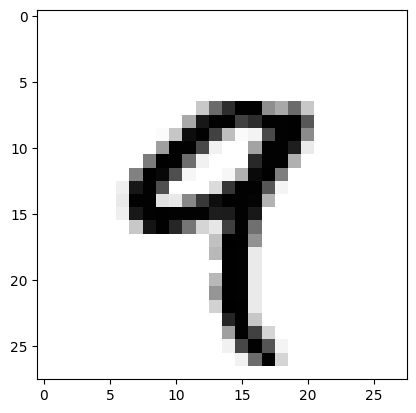

In [ ]:
# Plot a sample image from the training dataset
i = 4
digit = train_images[i]

import matplotlib.pyplot as plt
plt.imshow(digit, cmap = plt.cm.binary)
plt.show()

In [ ]:
print(train_labels[i])

9


### Step 4 - Building the layered Neural Network Model for Handwritten Digit Recognition

In [ ]:
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
network.add(layers.Dense(10, activation='softmax'))

### Step 5- Compiling the Neural Network Model

In [ ]:
# by providing optimizer, loss function and accuracy metric
network.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

### Step 6 - Input Data Preparation or Pre-Processing

In [ ]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32')/255

test_images = test_images.reshape((10000, 28*28))
test_images = test_images.astype('float32')/255

In [ ]:
print(train_labels[0])
print(test_labels[0])

5
7


In [ ]:
# Preparing the labels (using One Hot Encoding)
from keras.utils to_categorical
import
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)


In [ ]:
print(train_labels[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


### Step7: We are now ready to train the network.
Training is done in Keras via calling *fit* method on the network model

In [ ]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)


Epoch 1/5
469/469 [==============================] - 5s 9ms/step - loss: 0.2629 - accuracy: 0.9253
Epoch 2/5
469/469 [==============================] - 5s 11ms/step - loss: 0.1057 - accuracy: 0.9689
Epoch 3/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0702 - accuracy: 0.9794
Epoch 4/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0511 - accuracy: 0.9848
Epoch 5/5
469/469 [==============================] - 5s 11ms/step - loss: 0.0384 - accuracy: 0.9882


### Step 8: Evaluating the Performance of our Trained NN Model on Test Data

In [ ]:
test_loss,test_acc = network.evaluate(test_images, test_labels)
print('test accuracy: ', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.0698 - accuracy: 0.9798
test accuracy:  0.9797999858856201


### Step 9 - The Final Step -Using the Trained and Tested Model to do actual work of Prediction

In [ ]:
network.predict(test_images[0:1])

1/1 [==============================] - 0s 145ms/step


array([[4.7053657e-08, 5.4932632e-09, 1.0811377e-06, 3.9504586e-05,
        6.2357397e-11, 2.3212078e-07, 1.5316814e-12, 9.9995768e-01,
        1.3169583e-07, 1.4159730e-06]], dtype=float32)

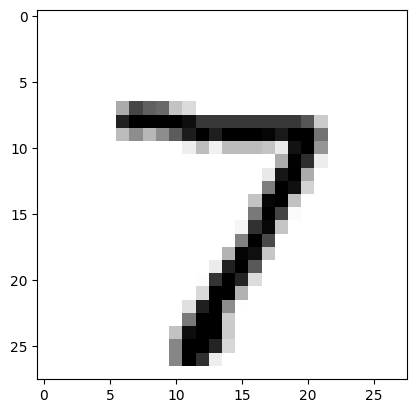

In [ ]:
test_images_copy = test_images.reshape((10000,28,28))
digit = test_images_copy[0]

import matplotlib.pyplot as plt
plt.imshow(digit, cmap = plt.cm.binary)
plt.show()